# Import Libraries and Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('Organized_Data.xlsx')

In [3]:
df.head(10)
#Heat is measuered in celcisus
#Precipitation is measured mm/m2
#Pressure is measured in hpa

,Time_of_the_year,Average_Heat,Average_Relative_Humidity,Average_Pressure,Total_Precipitation
0,Lefkosa_OCAK_2014,11.6,76.0,1003.3,11.4
1,Lefkosa_OCAK_2015,9.2,75.6,1002.7,46.8
2,Lefkosa_OCAK_2016,9.3,69.0,1003.1,26.2
3,Lefkosa_OCAK_2017,8.4,71.4,1003.2,18.6
4,Lefkosa_OCAK_2018,11.0,74.5,1000.9,69.2
5,Lefkosa_SUBAT_2014,11.6,75.5,1002.5,15.0
6,Lefkosa_SUBAT_2015,9.7,75.8,997.8,44.6
7,Lefkosa_SUBAT_2016,13.2,64.6,1003.6,13.6
8,Lefkosa_SUBAT_2017,9.9,64.9,1005.6,6.0
9,Lefkosa_SUBAT_2018,12.6,75.1,999.3,21.2


In [4]:
df['Total_Precipitation'].describe()

count    300.000000
mean      26.461333
std       36.967379
min        0.000000
25%        1.175000
50%       15.100000
75%       35.250000
max      334.200000
Name: Total_Precipitation, dtype: float64

# Plot values against precipitation

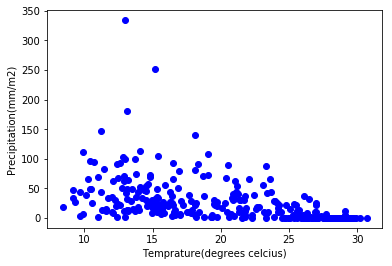

In [5]:
plt.scatter(df.Average_Heat, df.Total_Precipitation,  color='blue')
plt.xlabel("Temprature(degrees celcius)")
plt.ylabel("Precipitation(mm/m2)")
plt.show()

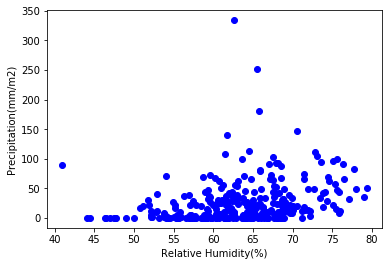

In [6]:
plt.scatter(df.Average_Relative_Humidity, df.Total_Precipitation,  color='blue')
plt.xlabel("Relative Humidity(%)")
plt.ylabel("Precipitation(mm/m2)")
plt.show()

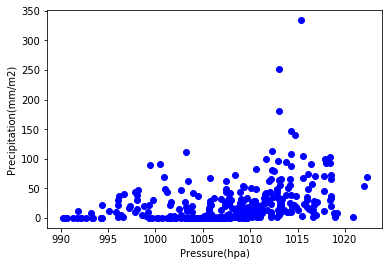

In [7]:
plt.scatter(df.Average_Pressure, df.Total_Precipitation,  color='blue')
plt.xlabel("Pressure(hpa)")
plt.ylabel("Precipitation(mm/m2)")
plt.show()

# Exploring Data

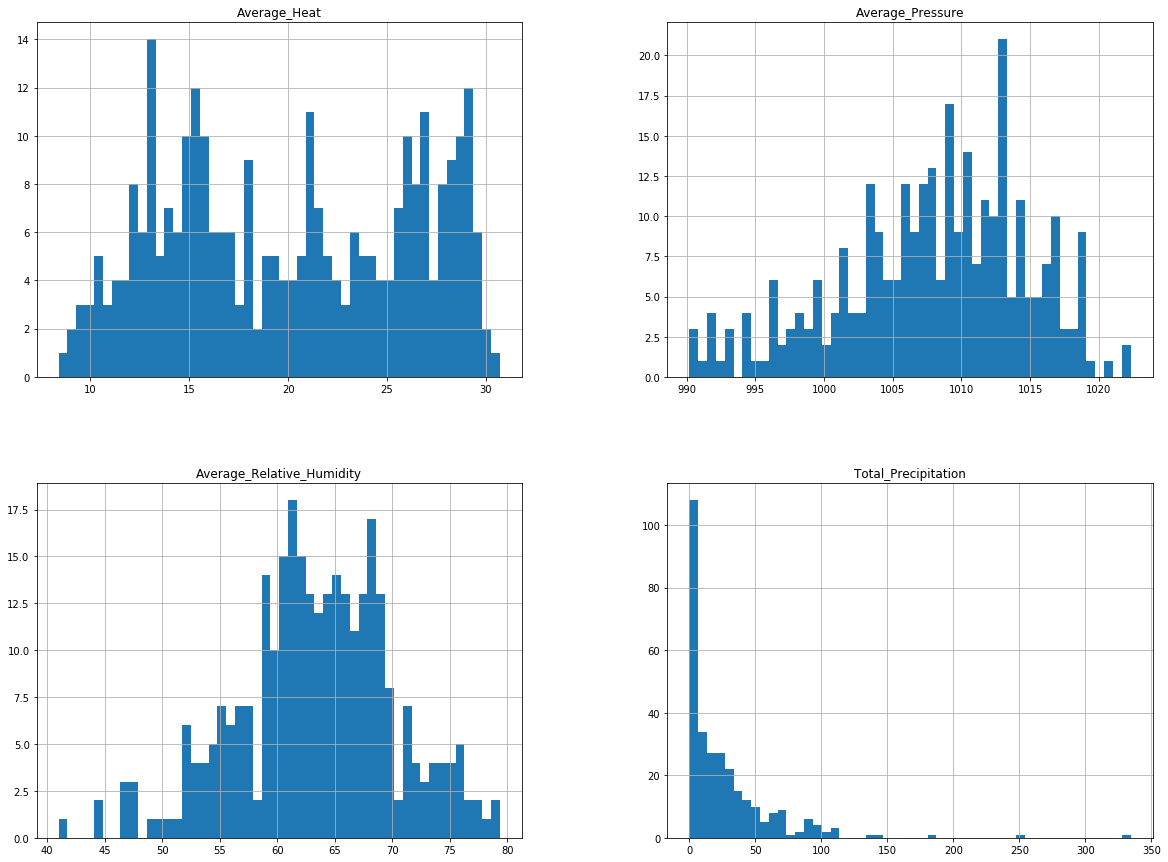

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

## Split data in to train and test sets in a stratified manner

In [9]:
df['heat_cat']=np.ceil(df['Average_Heat']/6)
df['heat_cat'].where(df['heat_cat']<6,6.0,inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["heat_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
strat_train_set['heat_cat'].value_counts()/len(strat_train_set)

3.0    0.333333
5.0    0.329167
4.0    0.241667
2.0    0.091667
6.0    0.004167
Name: heat_cat, dtype: float64

In [12]:
strat_test_set['heat_cat'].value_counts()/len(strat_test_set)

3.0    0.333333
5.0    0.333333
4.0    0.233333
2.0    0.083333
6.0    0.016667
Name: heat_cat, dtype: float64

In [13]:
for set in (strat_train_set,strat_test_set):
    set.drop(['heat_cat'],axis =1 ,inplace=True)
    set.drop(['Time_of_the_year'],axis =1 ,inplace=True)

df = strat_train_set.copy()    

In [14]:
corr_matrix = df.corr()

corr_matrix['Total_Precipitation'].sort_values(ascending=False)

Total_Precipitation          1.000000
Average_Pressure             0.333385
Average_Relative_Humidity    0.295690
Average_Heat                -0.465730
Name: Total_Precipitation, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002717B00E748>,
      dtype=object)

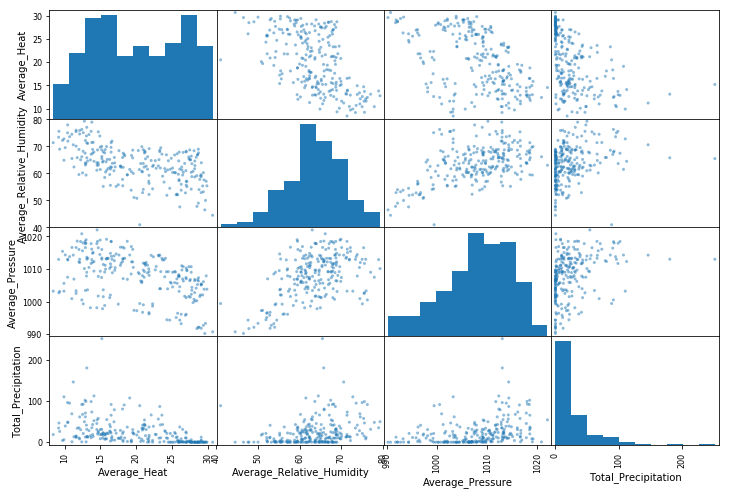

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,8))

# Prepare Data

In [16]:
df = strat_train_set.drop('Total_Precipitation',axis=1)
df_labels = strat_train_set['Total_Precipitation'].copy()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df)

array([[-9.11888777e-01,  6.17055553e-02,  1.44456628e+00],
       [-5.76138423e-01, -1.92297599e-01,  8.68722641e-01],
       [ 1.09997173e+00,  2.07373045e-02, -9.35106019e-01],
       [ 1.03710109e+00, -3.41711219e-01,  2.51642116e-01],
       [-1.17393783e+00,  1.28689724e+00,  1.26498630e+00],
       [-5.64779441e-01,  1.25171274e+00,  7.33847623e-01],
       [ 1.22941128e+00,  2.11601155e-01, -9.78813316e-01],
       [-6.17083588e-01,  2.41001900e-01, -1.00019189e+00],
       [ 2.49368940e-01, -3.01224948e-01,  1.20520224e-01],
       [ 1.02072302e+00, -1.46231337e+00, -2.17838859e+00],
       [-1.38579604e+00,  9.75056557e-01,  1.27021217e+00],
       [-9.11888777e-01, -3.56652582e-01, -1.45674311e+00],
       [-3.05900333e-01,  5.84653226e-01,  7.67103175e-01],
       [ 2.86351669e-01,  8.36728463e-01,  8.40150535e-03],
       [ 1.46345913e+00, -6.63673472e-01, -8.76196184e-01],
       [ 1.26375239e+00, -7.11871414e-01, -6.65546014e-01],
       [ 1.57757727e+00, -2.03008513e+00

In [18]:
df.shape

(240, 3)

In [19]:
df_labels.shape

(240,)

# Train Data

## Linear Regression

In [20]:
#Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df,df_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df)
lin_mse = mean_squared_error(df_predictions,df_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

28.756607950729617

## Decision Tree Regressor

In [22]:
#Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df,df_labels)

df_predictions = tree_reg.predict(df)
tree_mse = mean_squared_error(df_predictions,df_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#Seems like the model overfit the training data or it is perfect

0.0

## Performing Cross Validation with different models

In [23]:
#Let's perform cross-validation to train and test the training data with itself
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,df,df_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standart deviation: ",scores.std())
    
display_scores(rmse_scores)
#decision tree regressor model seems to perform worse than linear regression model

Scores:  [31.5269858  47.72957242 32.35967784 31.25793899 34.32527009 33.5277062
 32.42300495 33.06776502 52.85547906 33.86495238]
Mean:  36.29383527541791
Standart deviation:  7.151516459290078


In [24]:
#Let's perform cross-validation with linear regression model
scores = cross_val_score(lin_reg,df,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores:  [21.73109949 36.19983974 25.49719858 18.09231294 30.27746572 21.56928026
 16.44231502 28.30759981 49.71201452 28.53218817]
Mean:  27.6361314259806
Standart deviation:  9.28196781213112


In [25]:
#Let's try a random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(df,df_labels)
df_predictions = forest_reg.predict(df)
forest_mse = mean_squared_error(df_predictions,df_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
#This value really looks promissing let's try cross-validation to make sure it doesn't overfit training set

11.076859088320115

In [26]:
scores = cross_val_score(forest_reg,df,df_labels,scoring='neg_mean_squared_error',cv=10)

rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)
#it performs very similar to our linear regression model

Scores:  [24.19465977 34.64124626 22.20501986 23.05057623 28.56074578 25.09833737
 18.81912727 31.17621043 48.55316086 32.13079061]
Mean:  28.84298744462577
Standart deviation:  8.075677985882082


In [27]:
#Let's try a support vector machine regressor
from sklearn.svm import SVR
svm_reg = SVR(gamma='auto')
svm_reg.fit(df,df_labels)
df_predictions = svm_reg.predict(df)
svm_mse = mean_squared_error(df_predictions,df_labels)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

33.60511202381468

In [28]:
scores = cross_val_score(svm_reg,df,df_labels,scoring='neg_mean_squared_error',cv=10)

rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores:  [25.86663378 40.08684027 27.96666106 21.52674786 40.82501041 29.06955695
 15.42206275 36.13734897 55.89341086 32.03178669]
Mean:  32.48260595814834
Standart deviation:  10.844136542216964


## Trying to fine-tune the Random Forest Regressor model

In [29]:
#our linear regression and forest regressor models performed the best.
#so let's try different hyper parameters on random forest regressor to find the best model.

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[1,2,3]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[1,2,3]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(df, df_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
#Best parameters for random forest regressor
grid_search.best_params_

{'max_features': 1, 'n_estimators': 10}

In [31]:
#all tried combinations and their results
cvres = grid_search.cv_results_

for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)


34.58336941095842 {'max_features': 1, 'n_estimators': 3}
29.73259034712583 {'max_features': 1, 'n_estimators': 10}
29.885633021756643 {'max_features': 1, 'n_estimators': 30}
32.61498860158442 {'max_features': 2, 'n_estimators': 3}
31.726282145092263 {'max_features': 2, 'n_estimators': 10}
30.23317754615014 {'max_features': 2, 'n_estimators': 30}
32.91260854028325 {'max_features': 3, 'n_estimators': 3}
31.753398663240237 {'max_features': 3, 'n_estimators': 10}
31.584035234798023 {'max_features': 3, 'n_estimators': 30}
33.79972249502562 {'bootstrap': False, 'max_features': 1, 'n_estimators': 3}
30.369547542178935 {'bootstrap': False, 'max_features': 1, 'n_estimators': 10}
37.05983831239339 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
33.591746431725355 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
39.7634649917251 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
39.16684392335776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [32]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [33]:
sorted(zip(feature_importances,list(df)),reverse=True)

[(0.3882596059725597, 'Average_Heat'),
 (0.32766355521180274, 'Average_Relative_Humidity'),
 (0.2840768388156375, 'Average_Pressure')]

In [34]:
np.sqrt(-grid_search.best_score_)
#It doesnt seem like we have improved our model with using parameters

29.73259034712583

# Test the models


In [35]:
X_test = strat_test_set.drop('Total_Precipitation',axis=1)
y_test = strat_test_set['Total_Precipitation'].copy()
scaler.transform(X_test)

final_forest_model = grid_search.best_estimator_

final_predictions = final_forest_model.predict(X_test)
final_mse = mean_squared_error(final_predictions,y_test)
final_rmse = np.sqrt(final_mse)
final_rmse


45.98247644483711

In [36]:
from sklearn.metrics import r2_score

r2_score(y_test,final_predictions)

0.1372494790035932

In [37]:
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(final_predictions,y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

44.117595957592

In [38]:
from sklearn.metrics import r2_score

r2_score(y_test,final_predictions)

0.2058104028405947

# Conclusion
It looks like the linear model performs the best with the highest R-Squared value (0.206) and the lowest Root Mean Squared Error value (44.11).These numbers show us that __total precipitation__ can be predicted using __relative humidity__,__average heat__ and __average pressure__;however, they also demonstrate that __total_precipitation__ _can't_ be predicted with a high accuracy due to the fact that the RMSE of the model (44.11) is higher than the standart deviation of the the __total precipitations__ (36.97). To create better models more _relevant_ features should be added to the datasets and more data should be collected. 